In [1]:
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import Nadam

Using TensorFlow backend.


In [3]:
train_data_dir = 'E:/flipkart_classifier/train'
test_data_dir  = 'E:/flipkart_classifier/test'

In [6]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Dropout layer
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Dropout layer
classifier.add(Dropout(0.5))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))


classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = SGD(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 128)      

# Implementing our model with SGD and callbacks

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import optimizers

checkpoint= ModelCheckpoint(r"E:/flipkart_classifier/flipkart_cnn_1.h5",
                           monitor= "val_loss",
                           mode= "min",
                           save_best_only= True,
                           verbose=1)

earlystop= EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience= 3,
                        verbose= 1,
                        restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose= 1,
                             min_delta=0.0001)

callbacks= [checkpoint, earlystop, reduce_lr]

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
classifier.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/flipkart_classifier/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:/flipkart_classifier/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 20,
                         callbacks= callbacks,
                         validation_data = test_set,    
                         validation_steps = 100)
                                

Found 1200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 447s 2s/step - loss: 0.4216 - accuracy: 0.8043 - val_loss: 0.1786 - val_accuracy: 0.7250

Epoch 00001: val_loss improved from inf to 0.17857, saving model to E:/flipkart_classifier/flipkart_cnn_1.h5
Epoch 2/20
200/200 [==============================] - 442s 2s/step - loss: 0.3153 - accuracy: 0.8638 - val_loss: 0.2405 - val_accuracy: 0.7500

Epoch 00002: val_loss did not improve from 0.17857
Epoch 3/20
200/200 [==============================] - 440s 2s/step - loss: 0.1930 - accuracy: 0.9215 - val_loss: 2.5780 - val_accuracy: 0.7000

Epoch 00003: val_loss did not improve from 0.17857
Epoch 4/20
200/200 [==============================] - 443s 2s/step - loss: 0.1730 - accuracy: 0.9312 - val_loss: 0.7028 - val_accuracy: 0.8250

Epoch 00004: val_loss did not improve from 0.17857
Restoring model weights from the end of the best epoch

Epoch 00004: ReduceLROnP

# Implementing our CNN model with Nesterov Accelerated Gradient Descent

In [12]:
checkpoint= ModelCheckpoint(r"E:/flipkart_classifier/flipkart_cnn_2.h5",
                           monitor= "val_loss",
                           mode= "min",
                           save_best_only= True,
                           verbose=1)

earlystop= EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience= 3,
                        verbose= 1,
                        restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose= 1,
                             min_delta=0.0001)

callbacks= [checkpoint, earlystop, reduce_lr]

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
classifier.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/flipkart_classifier/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:/flipkart_classifier/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 20,
                         callbacks= callbacks,
                         validation_data = test_set,    
                         validation_steps = 100)

Found 1200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 437s 2s/step - loss: 0.2781 - accuracy: 0.8809 - val_loss: 0.4489 - val_accuracy: 0.8250

Epoch 00001: val_loss improved from inf to 0.44890, saving model to E:/flipkart_classifier/flipkart_cnn_2.h5
Epoch 2/20
200/200 [==============================] - 670s 3s/step - loss: 0.1930 - accuracy: 0.9209 - val_loss: 0.2257 - val_accuracy: 0.7500

Epoch 00002: val_loss improved from 0.44890 to 0.22570, saving model to E:/flipkart_classifier/flipkart_cnn_2.h5
Epoch 3/20
200/200 [==============================] - 525s 3s/step - loss: 0.1968 - accuracy: 0.9231 - val_loss: 1.9701 - val_accuracy: 0.7750

Epoch 00003: val_loss did not improve from 0.22570
Epoch 4/20
200/200 [==============================] - 414s 2s/step - loss: 0.1228 - accuracy: 0.9503 - val_loss: 0.6191 - val_accuracy: 0.7750

Epoch 00004: val_loss did not improve from 0.22570
Epoch 5/20
200/200

# Implementing our model with RMSprop

In [16]:
checkpoint= ModelCheckpoint(r"E:/flipkart_classifier/flipkart_cnn_3.h5",
                           monitor= "val_loss",
                           mode= "min",
                           save_best_only= True,
                           verbose=1)

earlystop= EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience= 3,
                        verbose= 1,
                        restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose= 1,
                             min_delta=0.0001)

callbacks= [checkpoint, earlystop, reduce_lr]

rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-07)
classifier.compile(loss='binary_crossentropy',
                  optimizer=rms,
                  metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/flipkart_classifier/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:/flipkart_classifier/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 20,
                         callbacks= callbacks,
                         validation_data = test_set,    
                         validation_steps = 100)

Found 1200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 990s 5s/step - loss: 0.1217 - accuracy: 0.9631 - val_loss: 0.8604 - val_accuracy: 0.7750

Epoch 00001: val_loss improved from inf to 0.86037, saving model to E:/flipkart_classifier/flipkart_cnn_3.h5
Epoch 2/20
200/200 [==============================] - 1087s 5s/step - loss: 0.0601 - accuracy: 0.9783 - val_loss: 0.1929 - val_accuracy: 0.8000

Epoch 00002: val_loss improved from 0.86037 to 0.19293, saving model to E:/flipkart_classifier/flipkart_cnn_3.h5
Epoch 3/20
200/200 [==============================] - 798s 4s/step - loss: 0.0488 - accuracy: 0.9833 - val_loss: 2.9731 - val_accuracy: 0.7750

Epoch 00003: val_loss did not improve from 0.19293
Epoch 4/20
200/200 [==============================] - 946s 5s/step - loss: 0.0455 - accuracy: 0.9880 - val_loss: 2.4988 - val_accuracy: 0.7250

Epoch 00004: val_loss did not improve from 0.19293
Epoch 5/20
200/20

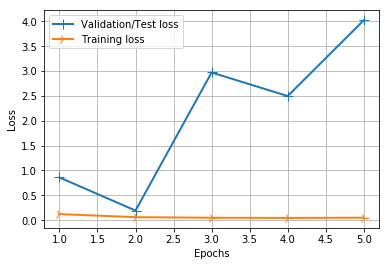

In [19]:
#Plotting our loss & Accuracy Charts
import matplotlib.pyplot as plt

history_dict = model.history

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
epochs= range(1,len(loss_values)+1)

line1= plt.plot(epochs,val_loss_values, label='Validation/Test loss')
line2= plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

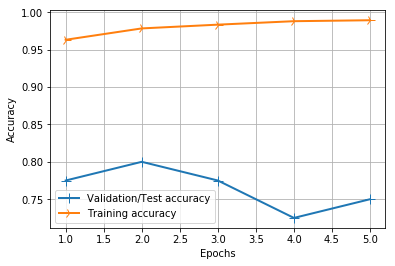

In [20]:
history_dict = model.history

acc_values= history_dict['accuracy']
val_acc_values= history_dict['val_accuracy']
epochs= range(1,len(loss_values)+1)

line1= plt.plot(epochs,val_acc_values, label='Validation/Test accuracy')
line2= plt.plot(epochs, acc_values, label='Training accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Implementing our CNN model with Adam optimizer

In [21]:
checkpoint= ModelCheckpoint(r"E:/flipkart_classifier/flipkart_cnn_4.h5",
                           monitor= "val_loss",
                           mode= "min",
                           save_best_only= True,
                           verbose=1)

earlystop= EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience= 3,
                        verbose= 1,
                        restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose= 1,
                             min_delta=0.0001)

callbacks= [checkpoint, earlystop, reduce_lr]

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
classifier.compile(loss='binary_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/flipkart_classifier/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:/flipkart_classifier/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 20,
                         callbacks= callbacks,
                         validation_data = test_set,    
                         validation_steps = 100)

Found 1200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 662s 3s/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 3.0733e-05 - val_accuracy: 0.8250

Epoch 00001: val_loss improved from inf to 0.00003, saving model to E:/flipkart_classifier/flipkart_cnn_4.h5
Epoch 2/20
200/200 [==============================] - 636s 3s/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 1.5541 - val_accuracy: 0.6750

Epoch 00002: val_loss did not improve from 0.00003
Epoch 3/20
200/200 [==============================] - 432s 2s/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 5.4596 - val_accuracy: 0.8250

Epoch 00003: val_loss did not improve from 0.00003
Epoch 4/20
200/200 [==============================] - 437s 2s/step - loss: 0.0295 - accuracy: 0.9922 - val_loss: 1.6404 - val_accuracy: 0.7250

Epoch 00004: val_loss did not improve from 0.00003
Restoring model weights from the end of the best epoch

Epoch 00004: ReduceL

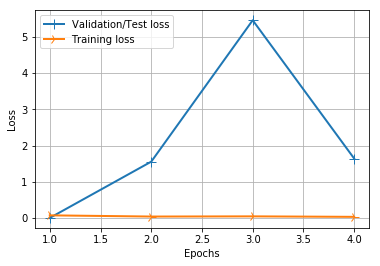

In [22]:
#Plotting our loss & Accuracy Charts
import matplotlib.pyplot as plt

history_dict = model.history

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
epochs= range(1,len(loss_values)+1)

line1= plt.plot(epochs,val_loss_values, label='Validation/Test loss')
line2= plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

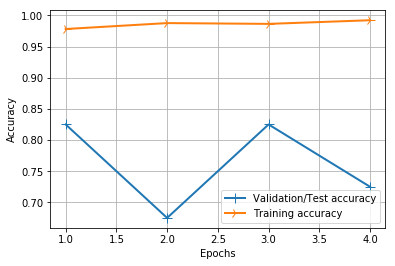

In [23]:
history_dict = model.history

acc_values= history_dict['accuracy']
val_acc_values= history_dict['val_accuracy']
epochs= range(1,len(loss_values)+1)

line1= plt.plot(epochs,val_acc_values, label='Validation/Test accuracy')
line2= plt.plot(epochs, acc_values, label='Training accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Implementing our CNN model with Nadam optimizer

In [24]:
checkpoint= ModelCheckpoint(r"E:/flipkart_classifier/flipkart_cnn_5.h5",
                           monitor= "val_loss",
                           mode= "min",
                           save_best_only= True,
                           verbose=1)

earlystop= EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience= 3,
                        verbose= 1,
                        restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose= 1,
                             min_delta=0.0001)

callbacks= [checkpoint, earlystop, reduce_lr]

nadam = optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
classifier.compile(loss='binary_crossentropy',
                  optimizer=nadam,
                  metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/flipkart_classifier/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:/flipkart_classifier/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 20,
                         callbacks= callbacks,
                         validation_data = test_set,    
                         validation_steps = 100)

Found 1200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 591s 3s/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 1.6603 - val_accuracy: 0.6750

Epoch 00001: val_loss improved from inf to 1.66034, saving model to E:/flipkart_classifier/flipkart_cnn_5.h5
Epoch 2/20
200/200 [==============================] - 512s 3s/step - loss: 0.0462 - accuracy: 0.9878 - val_loss: 0.4522 - val_accuracy: 0.7500

Epoch 00002: val_loss improved from 1.66034 to 0.45223, saving model to E:/flipkart_classifier/flipkart_cnn_5.h5
Epoch 3/20
200/200 [==============================] - 463s 2s/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 10.9251 - val_accuracy: 0.7500

Epoch 00003: val_loss did not improve from 0.45223
Epoch 4/20
200/200 [==============================] - 455s 2s/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 13.0657 - val_accuracy: 0.7250

Epoch 00004: val_loss did not improve from 0.45223
Epoch 5/20
200/2